# **In-Depth Exploration of Heart Disease Prediction with Advanced Machine Learning Models**


![Heart Disease Image](https://i.ibb.co/3rjKL1g/heart-diease.jpg)


# Title: **Heart Disease Prediction** 💓

## About The Author

**Project Name**: Heart Disease Prediction 🫀

**Author Name**: Hassan Mehmood 👨‍💻

*Let's Connect to learn and bring a positive change in the industry* 🌍

[![Github](https://img.shields.io/badge/Github-HassanMehmood413-blue?style=flat-square)](https://github.com/HassanMehmood413)  
[![Kaggle](https://img.shields.io/badge/Kaggle-hassanmehmood413-orange?style=flat-square)](https://www.kaggle.com/hassanmehmood413)  
[![Linkedin](https://img.shields.io/badge/Linkedin-HassanMehmood-0A66C2?style=flat-square)](https://www.linkedin.com/in/hassan-mehmood-01a3a9247/)


# Meta-Data:

## Context:
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.  

### Content:
#### Column Descriptions:

* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type:
    - typical angina,
    - atypical angina,
    - non-anginal,
    - asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be**:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.  
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.  
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.  
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.  

# Import Libraries and Dataset:

Lets start the project by importing libraries that we will need in this project

In [1]:
# import libraries
import pandas as pd
import numpy as np

# to visualize the data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess the data 
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# For classification tasks 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier


# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score , mean_absolute_error  , mean_squared_error , r2_score

# to save the model 
import pickle

import warnings 
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
# Load the dataset 
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



---
# **<font color=" #1abc9c">Exploratory Data Analysis (EDA)</font>**
----

### Exploring each Column

In [3]:
# exploring datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Check the shape of data 
df.shape

(920, 16)

----
### **<font color=" #1abc9c">Dealing With Id Column</font>**
---

In [5]:
# Id Column
df['id'].describe()

count    920.000000
mean     460.500000
std      265.725422
min        1.000000
25%      230.750000
50%      460.500000
75%      690.250000
max      920.000000
Name: id, dtype: float64

- By Seeing the Id column , the total number of people in this datset are 920.


---
## **<font color=" #1abc9c">Dealing With Age Column</font>**
---

In [6]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

- The Average Age is 53.

<Axes: xlabel='age', ylabel='Count'>

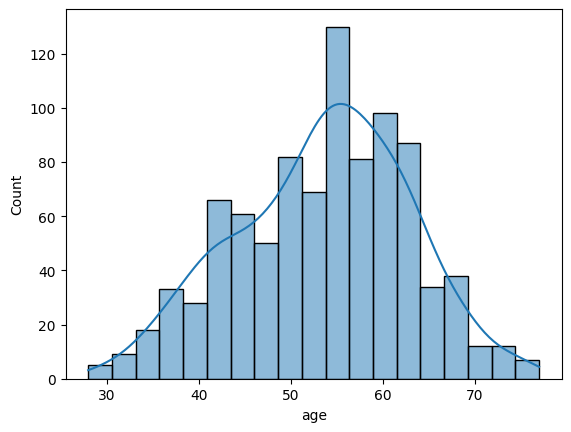

In [7]:
sns.histplot(df['age'],kde=True)

Mean:  53.51086956521739
Mode:  54
Median:  54.0


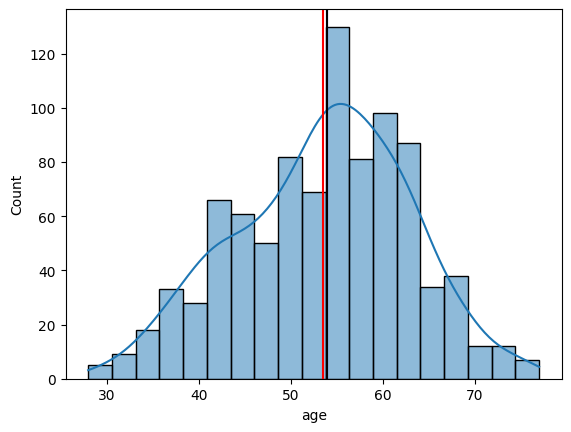

In [8]:
# Check mean,median and mode of age column
Mean = df['age'].mean()
Mode = df['age'].mode()[0]
Median = df['age'].median()
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].mode()[0],color='blue')
plt.axvline(df['age'].median(),color='black')

print('Mean: ', Mean)
print('Mode: ', Mode)
print('Median: ', Median)

In [9]:
# Lets explore the age column based on gender 

fig = px.histogram(data_frame=df,x='age',color='sex')
fig.show()

**_Observation_**:
- 22 Females are in the range of 54 - 55.
- 70 Males are in the range of 54 - 55.
- So according to this dataset , Males are getting heart disease more than females



---
## **<font color=" #1abc9c">Dealing With Sex Column</font>**
---

In [10]:
# Find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
# Lets calculate male and female percentage 
Male_count = 726
Female_count = 194

# Check male percentage 
Male_Per = (Male_count/920)*100
Female_Per = (Female_count/920) * 100

print("The percentage of Male having heart disease are:",Male_Per)
print("The percentage of Female having heart disease are:",Female_Per)

The percentage of Male having heart disease are: 78.91304347826087
The percentage of Female having heart disease are: 21.086956521739133


In [12]:
# Find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

**_Observations_:**
- Males are 726 , Females are 194.
- Percentage of Males in this dataset are 78.91.
- Percentage of Females in this dataset are 21.08.
- Males are 274% more in this dataset than Females.


---
## **<font color=" #1abc9c">Dealing With Dataset Column</font>**
---

In [13]:
# Lets deal with dataset Column 
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
# Find unique values count in the dataset column 
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [15]:
# lets check the dataset column with respect with sex column
fig = px.histogram(data_frame=df,x='age',color='dataset')
fig.show()

# lets find the mean , median and mode of age column with respect to dataset column
print(df.groupby('dataset')['age'].mean())
print('----------------------------------')
print(df.groupby('dataset')['age'].median())
print('----------------------------------')
print(df.groupby('dataset')['age'].agg(pd.Series.mode))


dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------------
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [16]:
# make piechat of dataset column 
fig = px.sunburst(df,path=['dataset','sex'])
fig.show()

**_Observations_**

**_These are the numbers of people from 4 different places_**  

| 🌍 **Location**        | **Total** |
|-------------------------|-----------|
| 🌆 **Cleveland**       | **304**   |
| 🇭🇺 **Hungary**         | **293**   |
| 🌴 **VA Long Beach**    | **200**   |
| 🇨🇭 **Switzerland**     | **123**   |

**_On the basis of Gender, these are the numbers of males and females from different places_**
| **Gender** | 🌍 **Location**        | **Total** |
|------------|-------------------------|-----------|
| 👩 **Female** | 🌆 Cleveland         | **97**    |
|              | 🇭🇺 Hungary           | **81**    |
|              | 🇨🇭 Switzerland       | **10**    |
|              | 🌴 VA Long Beach      | **6**     |
| 👨 **Male**   | 🇭🇺 Hungary           | **212**   |
|              | 🌆 Cleveland         | **207**   |
|              | 🌴 VA Long Beach      | **194**   |
|              | 🇨🇭 Switzerland       | **113**   |

_**The most frequent age group from each place**_  
| 🌍 **Location**        | **Age** |
|-------------------------|---------|
| 🌆 **Cleveland**       | **58**  |
| 🇭🇺 **Hungary**         | **54**  |
| 🇨🇭 **Switzerland**     | **61**  |
| 🌴 **VA Long Beach**    | **62**  |



---
## **<font color=" #1abc9c">Dealing With CP (Chest Pain) Column</font>**
---

**Asymptomatic:**
*Asymptomatic* means that individuals do not exhibit the typical symptoms associated with heart problems, such as chest pain.

**Non-Anginal Chest Pain:**
*Non-anginal* chest pain refers to discomfort that deviates from the typical pattern of angina. It may not be triggered by physical activity and can have various characteristics.

**Atypical Angina:**
*Atypical angina* maintains a connection to the heart but diverges from the classic symptoms commonly associated with typical angina. It may have different qualities compared to the usual anginal pain.

**Angina and Heart Disease:**
*Angina* is closely entwined with heart disease. It serves as a symptom, signaling an underlying issue with the blood supply to the heart. Typically associated with coronary artery disease (CAD), angina indicates a potential lack of oxygen and nutrients reaching the heart muscle, urging individuals to seek prompt medical attention.

In [17]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [18]:
fig = px.sunburst(df,path=['dataset','cp'])
fig.show()

- `Using the sunburst plot , you can check different types of CP in different datasets`

In [19]:
# Draw the plot of age column groupby by cp column
fig = px.histogram(data_frame=df,x='age',color='cp')
fig.show()


<Axes: xlabel='cp', ylabel='count'>

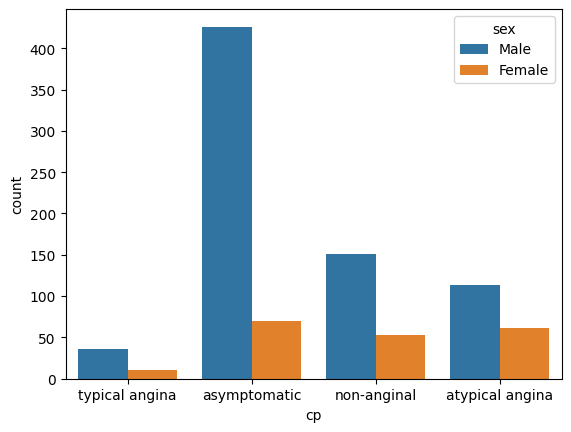

In [20]:
# count plot of cp column by sex
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

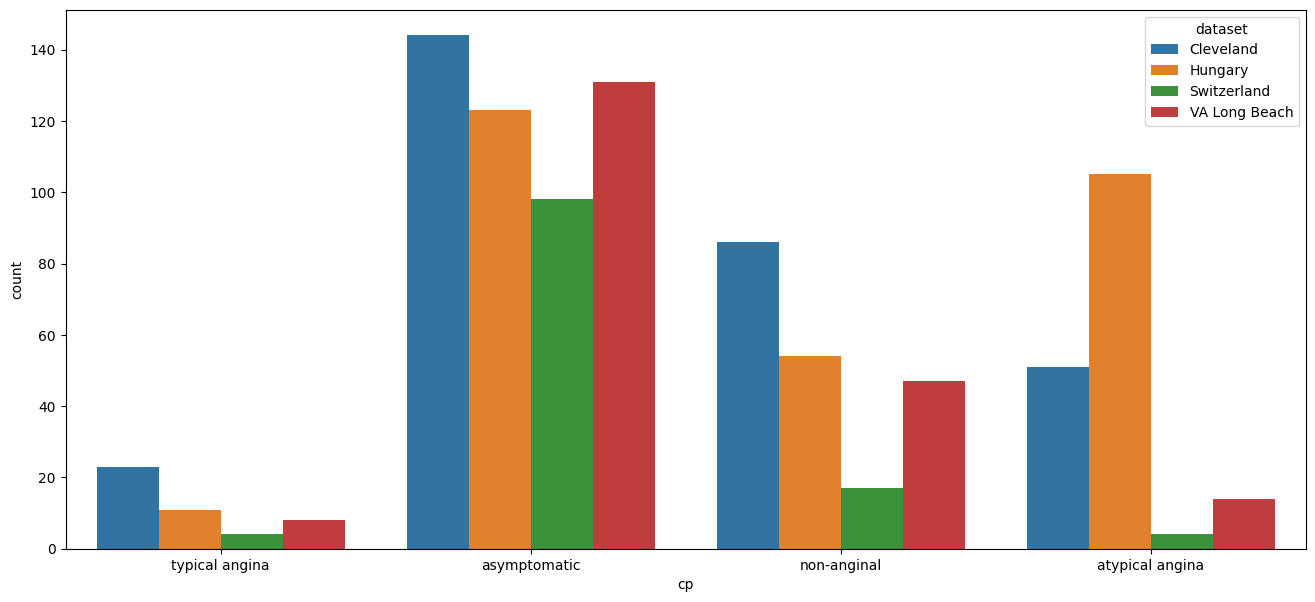

In [21]:
# Draw the plot of cp column with respect to dataset
plt.figure(figsize=(16,7))
sns.countplot(df,x='cp',hue='dataset')

> **_Observations_**  

| 🩺 **Condition**        | 🔢 **Count** | 📝 **Description**                                                                                  |
|-------------------------|--------------|----------------------------------------------------------------------------------------------------|
| 😀 **Asymptomatic**      | **496**      | Nearly 500 people showed no typical signs of heart problems, like chest pain.                    |
| 😕 **Non-Anginal**       | **204**      | About 200 people experienced chest discomfort, not the typical pain associated with heart issues. |
| 🤔 **Atypical Angina**   | **174**      | In 174 cases, heart-related symptoms weren't the classic ones you'd expect with typical heart pain.|
| 😧 **Typical Angina**    | **46**       | Only 46 people had the classic chest pain often associated with heart problems.                   |

_**Observations Based on Place and Number of People with Chest Pain**_  

| 🏙️ **Location**          | 🔢 **Count** | 📝 **Description**                                                                                  |
|--------------------------|--------------|----------------------------------------------------------------------------------------------------|
| 😀 **Asymptomatic**       |              |                                                                                                    |
| - 🌆 Cleveland            | **144**      | 144 people had heart issues but felt no usual signs.                                              |
| - 🌴 VA Long Beach         | **131**      | 131 people had heart issues without noticeable symptoms.                                          |
| - 🇭🇺 Hungary              | **123**      | 123 people had heart issues without showing symptoms.                                             |
| - 🇨🇭 Switzerland          | **98**       | 98 people had heart issues without typical signs.                                                 |
| 🤔 **Atypical Angina**    |              |                                                                                                    |
| - 🇭🇺 Hungary              | **105**      | 105 people had different heart symptoms.                                                          |
| - 🌆 Cleveland            | **51**       | 51 people had heart symptoms different from the usual.                                            |
| - 🌴 VA Long Beach         | **14**       | 14 people had atypical heart symptoms.                                                            |
| - 🇨🇭 Switzerland          | **4**        | 4 people had different heart symptoms.                                                            |
| 😕 **Non-Anginal**        |              |                                                                                                    |
| - 🌆 Cleveland            | **86**       | 86 people had chest discomfort without typical heart pain.                                        |
| - 🇭🇺 Hungary              | **54**       | 54 people had chest discomfort without typical heart pain.                                        |
| - 🌴 VA Long Beach         | **47**       | 47 people had different chest discomfort.                                                        |
| - 🇨🇭 Switzerland          | **17**       | 17 people had chest discomfort without typical heart pain.                                        |
| 😧 **Typical Angina**     |              |                                                                                                    |
| - 🌆 Cleveland            | **23**       | 23 people had classic chest pain linked to heart problems.                                        |
| - 🇭🇺 Hungary              | **11**       | 11 people had typical chest pain linked to heart issues.                                          |
| - 🌴 VA Long Beach         | **8**        | 8 people had classic chest pain related to heart problems.                                        |
| - 🇨🇭 Switzerland          | **4**        | 4 people had classic chest pain linked to heart issues.                                           |



---
## **<font color=" #1abc9c">Dealing With Trestbps Column</font>**
---

- The normal resting blood pressure is 120/80 mm Hg.

In [22]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [23]:
df['trestbps'].min()

0.0

- It is impossible to have a blood pressure at 0. So we are going to deal with this value and replacing it wiht null values.

In [24]:
df = df[df['trestbps'] != 0]

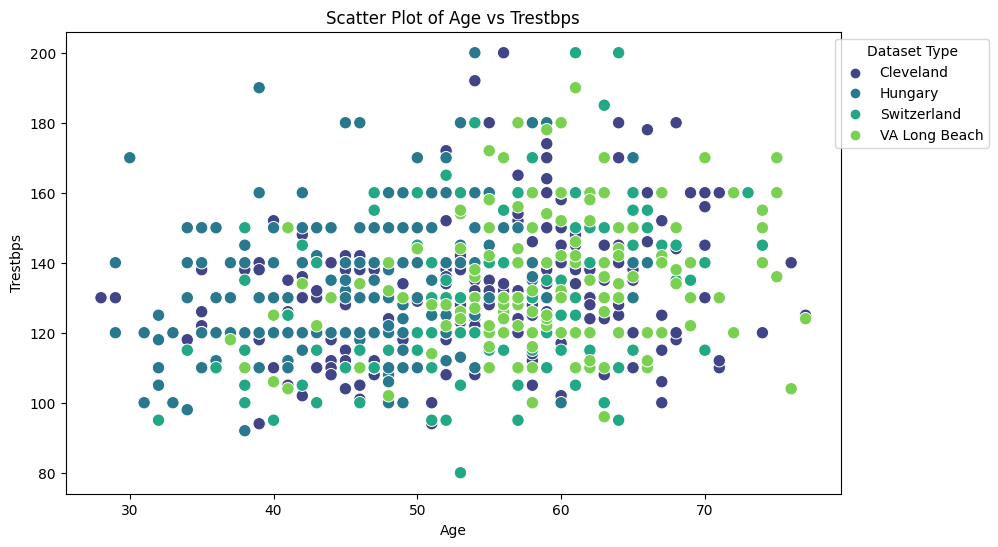

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='trestbps', hue='dataset', palette='viridis', s=80)

plt.title('Scatter Plot of Age vs Trestbps')
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.legend(title='Dataset Type', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

<Axes: xlabel='trestbps', ylabel='Count'>

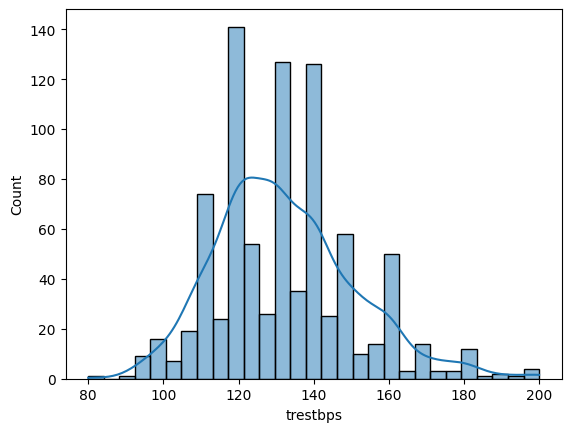

In [26]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

> _Observation._
- The Range of blood pressure is now between 80 - 200. Which is possible.


---
## **<font color=" #1abc9c">Exploring chol , fbs, restecg, thalch, exang, oldpeak, slope, ca, thal</font>**
---


In [27]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [28]:
df['restecg'] = df['restecg'].str.replace('-', '')

In [29]:
# Define the columns you want to explore
columns_to_explore = ['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Display datatype, value counts, and other insights for each column
for column in columns_to_explore:
    print(f"Column: {column}")
    print(f"Datatype: {df[column].dtype}")
    print(f"Value Counts:\n{df[column].value_counts()}\n")
    print(f"Number of unique values: {df[column].nunique()}")
    if df[column].dtype == 'object':
        print(f"Top value: {df[column].mode()[0]}")
    else:
        print(f"Mean: {df[column].mean()}")
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
    print("-" * 50)

# Additional insights (mean, min, max, etc.) for numerical columns
numerical_columns = ['chol', 'trestbps', 'thalch', 'oldpeak', 'ca']

print("Additional insights for numerical columns:")
print(df[numerical_columns].describe())

# Additional insights for categorical columns
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']

print("\nAdditional insights for categorical columns:")
for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Unique values: {df[column].unique()}")
    print("-" * 50)



Column: chol
Datatype: float64
Value Counts:
chol
0.0      171
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

Number of unique values: 217
Mean: 199.35433070866142
Min: 0.0
Max: 603.0
--------------------------------------------------
Column: fbs
Datatype: object
Value Counts:
fbs
False    691
True     138
Name: count, dtype: int64

Number of unique values: 2
Top value: False
--------------------------------------------------
Column: restecg
Datatype: object
Value Counts:
restecg
normal             550
lv hypertrophy     188
stt abnormality    179
Name: count, dtype: int64

Number of unique values: 3
Top value: normal
--------------------------------------------------
Column: thalch
Datatype: float64
Value Counts:
thalch
150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
195.0     1
91.0      1
87.0      1
192.0     1
73.0      1
Name: count, L

> _**Observations**_

- If the `ca` value is 0, it means there are no significant problems in the major blood vessels. It's like saying everything looks good in terms of how blood is flowing through the big arteries in the heart.

- The `thalch` variable typically represents the maximum heart rate achieved during exercise. If it's 60, it is the lowest number, indicating correct information.

- Cholesterol is an essential component of cell membranes and a precursor for certain hormones, so having a cholesterol level of exactly 0 is not consistent with normal physiological functioning. It's very rare and almost impossible.

- Need to impute Cholesterol.
- According to my observation, there is no need to remove zeros in `ca Column` because it makes sense to the data.


---
# **<font color=" #1abc9c">Lets Deal With Missing Values</font>**
---


We are going to define a function to impute missing values (Categorical / Continuous)

In [30]:
# Again check the missing values 
df.isnull().sum().sort_values(ascending=False)

ca          610
thal        485
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [31]:
# lets deal with thal column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.376496
thal        52.774755
slope       33.623504
fbs          9.793254
oldpeak      6.746464
trestbps     6.420022
thalch       5.984766
exang        5.984766
chol         3.264418
restecg      0.217628
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [32]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [33]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

**This function imputes missing values in Categorical columns**

*  `Step 1:` Separate rows with missing and non-missing values for the target column
*  `Step 2:` Extract features (X) and target variable (y) for non-missing values
*  `Step 3:` Extract other missing columns for later imputation
*  `Step 4:` Encode categorical columns using LabelEncoder
*  `Step 5:` Encode the target column if it is a boolean type
*  `Step 6:` Initialize IterativeImputer with RandomForestRegressor as the estimator
*  `Step 7:` Impute other missing columns in the dataset
*  `Step 8:` Split the data into training and testing sets
*  `Step 9:` Train a RandomForestClassifier to predict missing values in the target column
*  `Step 10:` Predict missing values and calculate accuracy
*  `Step 11:` Prepare the dataset with missing values for the final imputation
*  `Step 12:` Impute missing values in the target column for the original missing data
*  `Step 13:` Predict missing values in the target column
*  `Step 14:` Combine the imputed data with the original dataset


**This function imputes missing values in continuous columns**
  
*  `Step 1:` Separate rows with missing and non-missing values for the target column
*  `Step 2:` Extract features (X) and target variable (y) for non-missing values
*  `Step 3:` Extract other missing columns for later imputation
*  `Step 4:` Encode categorical columns using LabelEncoder
*  `Step 5: `Initialize IterativeImputer with RandomForestRegressor as the estimator
*  `Step 6:` Impute other missing columns in the dataset
*  `Step 7:` Split the data into training and testing sets
*  `Step 8:` Train a RandomForestRegressor to predict missing values in the target column
* ` Step 9:` Predict missing values and calculate performance metrics


In [34]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [35]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          610
thal        485
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [36]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.42%
MAE = 12.89343023255814 

RMSE = 16.745871740486884 

R2 = 0.12867489914885788 

Missing Values chol : 3.26%
MAE = 42.88589887640449 

RMSE = 58.80154793785314 

R2 = 0.7025219281123516 

Missing Values fbs : 9.79%
The feature 'fbs' has been imputed with 81.33 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.3 accuracy

Missing Values thalch : 5.98%
MAE = 16.58699421965318 

RMSE = 21.79418736475791 

R2 = 0.35408814403653055 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.75%
MAE = 0.531343023255814 

RMSE = 0.7643726071479403 

R2 = 0.43941608042613056 

Missing Values slope : 33.62%
The feature 'slope' has been imputed with 68.03 accuracy

Missing Values ca : 66.38%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.77%
The feature 'thal' has been imputed with 72.41 accuracy



In [37]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


---
# **<font color=" #1abc9c">Lets Deal With Outliers Values</font>**
---


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [39]:
import pandas as pd
from scipy import stats

# Sample DataFrame
# Assume your DataFrame is named 'df'
# df = ...

# Define the columns to check for outliers
columns_to_check = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculate Z-scores for the specified columns
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Define a Z-score threshold for outlier detection (you can adjust this threshold)
z_score_threshold = 2.8

# Identify outliers using the threshold
outliers = (z_scores > z_score_threshold).any(axis=1)

# Display the rows containing outliers
print("Rows with outliers:")
print(df[outliers])

# Remove outliers
df = df[~outliers]

# Display the DataFrame without outliers
print("\nDataFrame without outliers:")
print(df.head(5))


Rows with outliers:
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
40    41   65  Female      Cleveland     asymptomatic     150.0  225.0  False   
62    63   58    Male      Cleveland     asymptomatic     128.0  216.0  False   
91    92   62  Female      Cleveland     asymptomatic     160.0  164.0  False   
92    93   62    Male      Cleveland      non-anginal     130.0  231.0  False   
104  105   49    Male      Cleveland      non-anginal     120.0  188.0  False   
118  119   63    Male      Cleveland     asymptomatic     130.0  330.0   True   
121  122   63  Female      Cleveland     asymptomatic     150.0  407.0  False   
123  124   55    Male      Cleveland     asymptomatic     140.0  217.0  False   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
146  147   57    Male      Cleveland     asymptomatic     165.0  289.0   True   
152  153

In [40]:
# creating box plots to visulize the columns havon no outliers
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()
fig = px.box(data_frame=df, y='ca')
fig.show()

In [41]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame

# Scatter plot for thalch and oldpeak
fig1 = px.scatter(df, x='thalch', y='oldpeak', title='Scatter Plot: thalch vs oldpeak')

# Box plot for restecg and thalch
fig2 = px.box(df, x='restecg', y='thalch', title='Box Plot: thalch vs restecg')

# Violin plot for slope and thalch
fig3 = px.violin(df, x='slope', y='thalch', title='Violin Plot: thalch vs slope')

# Histogram for ca
fig4 = px.histogram(df, x='ca', title='Histogram: ca')

# Bar plot for fbs
fig5 = px.bar(df, x='fbs', title='Bar Plot: fbs')

# Pie chart for exang
fig6 = px.pie(df, names='exang', title='Pie Chart: exang')

# Display the plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()


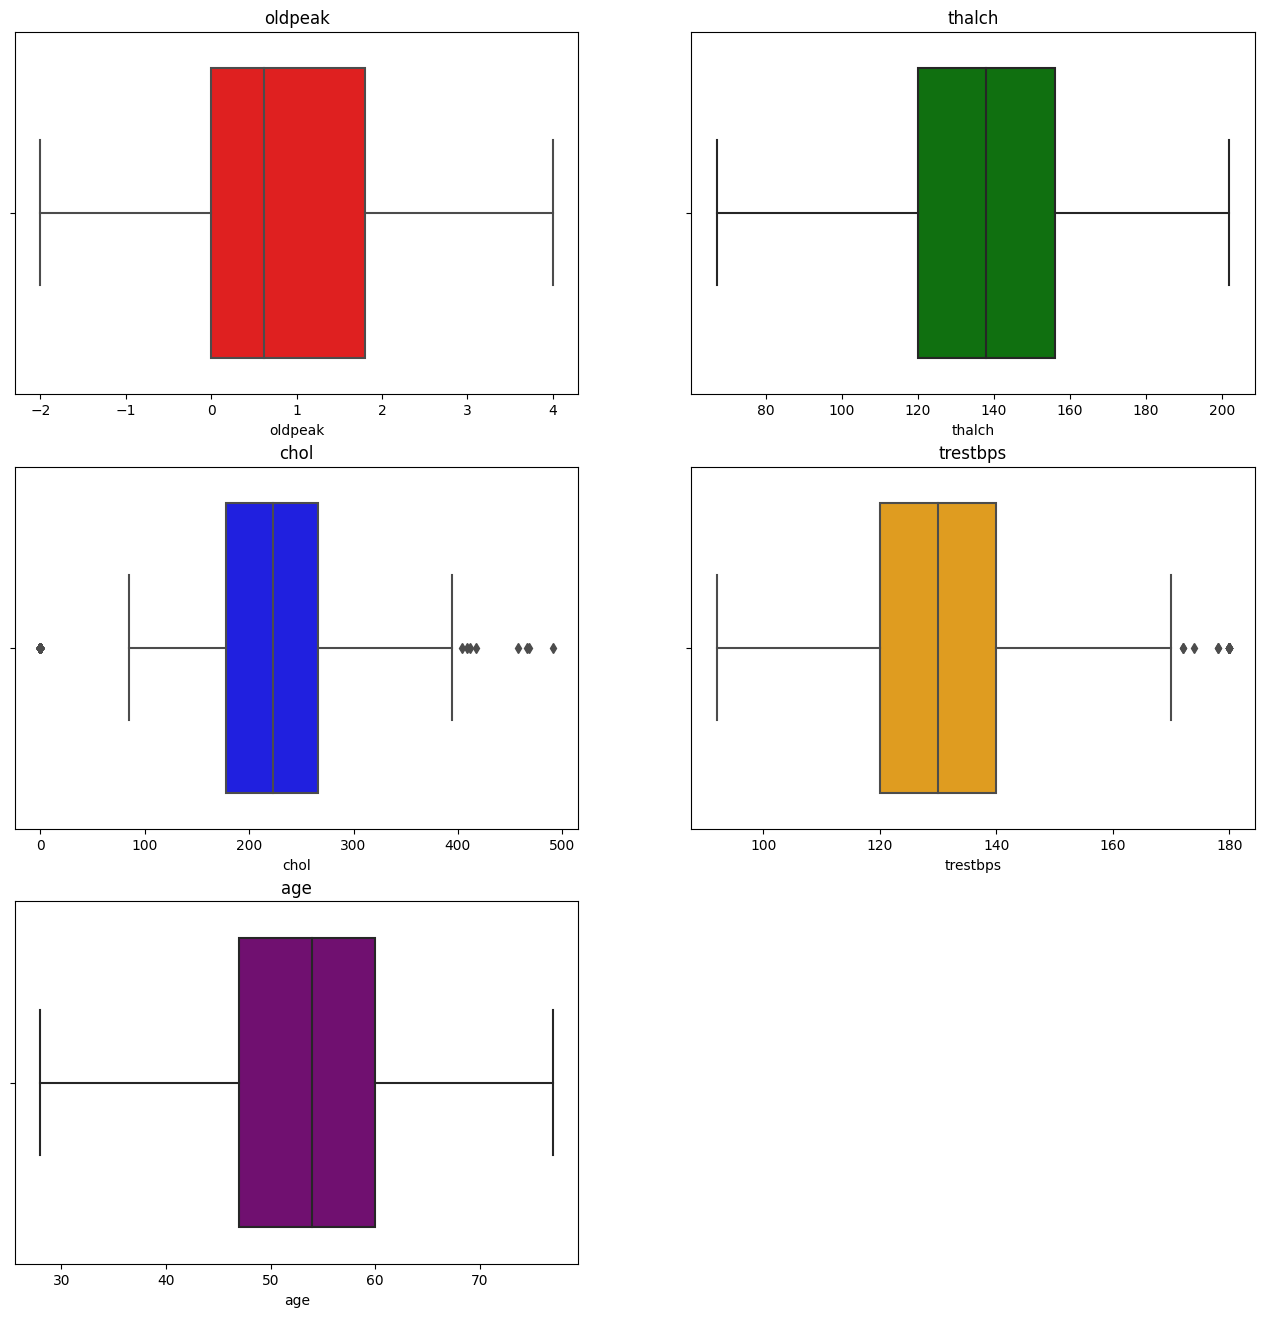

In [42]:
plt.figure(figsize=(16,16))

color = ['red','green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col],color=color[i])
    plt.title(col)

plt.show()


---
# **<font color=" #1abc9c">Visualize data to get more insights</font>**
---


In [43]:
df_pie = df['dataset'].value_counts().reset_index()
df_pie.columns = ['dataset', 'count']
fig7 = px.pie(df_pie, values='count', names='dataset')
fig7.show()

In [44]:
# create sunburst plot on titanic dataset
fig = px.sunburst(df,path=['sex','dataset'], values='age' , color='num')
# Show the plot
fig.show()

In [45]:
fig1 = px.scatter(df, x='age', y='chol', color='sex', size='trestbps', hover_data=['cp', 'dataset'])
fig1.update_layout(title='Scatter Plot: Age vs Cholesterol (colored by sex, sized by trestbps)')
fig1.show()

In [46]:
fig2 = px.box(df, x='sex', y='thalch', color='sex', points="all", hover_data=['cp', 'dataset'])
fig2.update_layout(title='Box Plot: Thalch distribution by Sex')
fig2.show()

In [47]:
fig3 = px.histogram(df, x='age', color='sex', marginal='box', nbins=20, hover_data=['cp', 'dataset'])
fig3.update_layout(title='Histogram: Age distribution (colored by sex)')
fig3.show()

In [48]:
fig4 = px.bar(df, x='cp', y='num', color='sex', barmode='group', facet_col='dataset', 
              category_orders={'cp': ['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']},
              hover_data=['age', 'chol'])
fig4.update_layout(title='Bar Chart: Number of cases by Chest Pain Type (colored by sex)')
fig4.show()

In [49]:
import plotly.express as px

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Scatter plot matrix for 'age', 'trestbps', 'chol', 'thalch', colored by 'sex'
scatter_matrix_sex = px.scatter_matrix(df, dimensions=['age', 'trestbps', 'chol', 'thalch'], color='sex',
                                       title='Scatter Plot Matrix with Gender Color')



# Bar chart for 'fbs' and 'restecg' with 'num' as color
bar_fbs_restecg_num = px.bar(df, x='fbs', color='restecg', facet_col='num', title='Bar Chart for Fasting Blood Sugar and Resting ECG vs Heart Disease')
bar_chol_num = px.bar(df, x='chol', facet_col='num', title='Bar Chart for Cholestrol and Resting ECG vs Heart Disease')

# Display the plots
scatter_matrix_sex.show()
bar_fbs_restecg_num.show()
bar_chol_num.show()


The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are : [0,1,2,3,4] which states that there are 5 types of heart diseases.

- `0 = no heart disease`
- `1 = mild heart disease`
- `2 = moderate heart disease`
- `3 = severe heart disease`
- `4 = critical heart disease`


---
# **<font color=" #1abc9c">Use Machine Learning Models For Predictions</font>**
---


In [50]:
# In some of the features, there is space will will create problem later on. 
# So we rename those attributes to handle problems in the future.
df['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
df['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
df['restecg'].replace({'normal': 'normal' , 'st-t abnormality': 'ST-T_wave_abnormality' , 'lv hypertrophy': 'left_ventricular_hypertrophy' }, inplace =True)

# Genrating New Dataset with Less Columns Which Are Necessary .
data_1 = df[['age','sex','cp','dataset', 'trestbps', 'chol', 'fbs','restecg' , 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Disease , 1 for Disease
data_1['target'] = ((df['num'] > 0)*1).copy()
# Encoding Sex 
data_1['sex'] = (df['sex'] == 'Male')*1
# Encoding Fbs and exang
data_1['fbs'] = (df['fbs'])*1
data_1['exang'] = (df['exang'])*1
# Renaming COlumns Names.
data_1.columns = ['age', 'sex', 'chest_pain_type','country' ,'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar','Restecg',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
# Load Data Sample 
data_1.head()

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,fasting_blood_sugar,Restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical_angina,Cleveland,145.0,233.0,1,left_ventricular_hypertrophy,150.0,0,2.3,downsloping,0.0,fixed_defect,0
2,67,1,asymptomatic,Cleveland,120.0,229.0,0,left_ventricular_hypertrophy,129.0,1,2.6,flat,2.0,reversable_defect,1
3,37,1,non-anginal,Cleveland,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical_angina,Cleveland,130.0,204.0,0,left_ventricular_hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0
5,56,1,atypical_angina,Cleveland,120.0,236.0,0,normal,178.0,0,0.8,upsloping,0.0,normal,0


## Let make X and y in our Data:

In [51]:
X = data_1.drop('target',axis=1)
y = data_1['target']

# Encode X using data seperate label encoder for all categorical columns 
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object'  or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## **Enlist all the models that we will use to predict the heart disease.**
**_Models should be classifiers for multi-class classifications_**:
- logistic regression
- SVM
- KNN
- Gradient Boost Classifier
- Random Forest
- Decision Tree
- NB
- XGBoost
- lightGBM
- CatBoost Classifier

In [52]:
# Define models
models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('SVM', SVC(random_state=42, probability=True)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('GaussianNB', GaussianNB()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('XGBClassifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
    ('CatBoostClassifier', CatBoostClassifier(random_state=42, verbose=0)),
]


## Train and evaluate models

In [53]:

model_scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted for imbalanced data
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    # Append metrics
    model_scores.append((name, accuracy, f1, precision, recall, roc_auc))
    
    # Print results
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} F1 Score: {f1:.2f}")
    print(f"{name} Precision: {precision:.2f}")
    print(f"{name} Recall: {recall:.2f}")
    if roc_auc is not None:
        print(f"{name} ROC AUC: {roc_auc:.2f}")
    print("-" * 50)

LogisticRegression Accuracy: 0.84
LogisticRegression F1 Score: 0.84
LogisticRegression Precision: 0.84
LogisticRegression Recall: 0.84
LogisticRegression ROC AUC: 0.89
--------------------------------------------------
SVM Accuracy: 0.72
SVM F1 Score: 0.71
SVM Precision: 0.72
SVM Recall: 0.72
SVM ROC AUC: 0.79
--------------------------------------------------
DecisionTreeClassifier Accuracy: 0.83
DecisionTreeClassifier F1 Score: 0.83
DecisionTreeClassifier Precision: 0.83
DecisionTreeClassifier Recall: 0.83
DecisionTreeClassifier ROC AUC: 0.83
--------------------------------------------------
RandomForestClassifier Accuracy: 0.86
RandomForestClassifier F1 Score: 0.86
RandomForestClassifier Precision: 0.86
RandomForestClassifier Recall: 0.86
RandomForestClassifier ROC AUC: 0.93
--------------------------------------------------
GaussianNB Accuracy: 0.81
GaussianNB F1 Score: 0.81
GaussianNB Precision: 0.81
GaussianNB Recall: 0.81
GaussianNB ROC AUC: 0.91
-------------------------------

In [54]:
for name, accuracy, f1, *rest in model_scores:
    print(f"{name}: Accuracy = {accuracy:.2f}, F1 Score = {f1:.2f}")


LogisticRegression: Accuracy = 0.84, F1 Score = 0.84
SVM: Accuracy = 0.72, F1 Score = 0.71
DecisionTreeClassifier: Accuracy = 0.83, F1 Score = 0.83
RandomForestClassifier: Accuracy = 0.86, F1 Score = 0.86
GaussianNB: Accuracy = 0.81, F1 Score = 0.81
KNeighborsClassifier: Accuracy = 0.68, F1 Score = 0.68
GradientBoostingClassifier: Accuracy = 0.85, F1 Score = 0.85
XGBClassifier: Accuracy = 0.84, F1 Score = 0.84
AdaBoostClassifier: Accuracy = 0.82, F1 Score = 0.82
CatBoostClassifier: Accuracy = 0.84, F1 Score = 0.84


---
# **Comprehensive Report About All Insights** 
---

## ![](http://)📊 Age Distribution:
- There are 920 data points, and the average age is approximately **53.5** years, with an average difference of **9.4** years.
- The youngest person is **28** years old, and the oldest is **77** years.
- The majority of ages fall between **47** to **60** years.

## 👨‍👩‍👧 Gender Distribution:
- Approximately **77.77%** of individuals with heart disease in the dataset are males.
- Approximately **22.22%** of individuals with heart disease in the dataset are females.

## ❤️ Age and Heart Disease:
- The age range **54-55** has the highest occurrence of heart disease.

## 🌍 Regional Analysis:

**"In the dataset, Hungary has the highest heart disease prevalence at 32.7%, followed by Cleveland (31.7%), VA Long Beach (22.4%), and Switzerland (13.2%), considering both males and females."**

- **Female:**
  - <font color="#FFA500">Cleveland</font>: **97**
  - <font color="#FFA500">Hungary</font>: **81**
  - <font color="#FFA500">Switzerland</font>: **10**
  - <font color="#FFA500">VA Long Beach</font>: **6**
- **Male:**
  - <font color="#FFA500">Hungary</font>: **212**
  - <font color="#FFA500">Cleveland</font>: **207**
  - <font color="#FFA500">VA Long Beach</font>: **194**
  - <font color="#FFA500">Switzerland</font>: **113**

## 📈 Age Statistics:
- **Mean Age:**
  - <font color="#FFA500">Cleveland</font>: **54.35**
  - <font color="#FFA500">Switzerland</font>: **55.32**
  - <font color="#FFA500">VA Long Beach</font>: **59.35**
  - <font color="#FFA500">Hungary</font>: **47.89**
- **Median Age:**
  - <font color="#FFA500">Cleveland</font>: **55.5**
  - <font color="#FFA500">Switzerland</font>: **56.0**
  - <font color="#FFA500">VA Long Beach</font>: **60.0**
  - <font color="#FFA500">Hungary</font>: **49.0**
- **Mode of Age:**
  - <font color="#FFA500">Cleveland</font>: **58**
  - <font color="#FFA500">Switzerland</font>: **61**
  - <font color="#FFA500">VA Long Beach</font>: **62, 63**
  - <font color="#FFA500">Hungary</font>: **54**

## 💔 Chest Pain Types:
- Asymptomatic: <font color="#FFA500">VA Long Beach</font> (129), Cleveland, Hungary, Switzerland.
- Atypical Angina: <font color="#FFA500">Hungary</font> (104), Cleveland, VA Long Beach, Switzerland.
- Non-Anginal: <font color="#FFA500">Cleveland</font> (80), Hungary, VA Long Beach, Switzerland.
- Typical Angina: <font color="#FFA500">Cleveland</font> (22), Hungary, VA Long Beach, Switzerland.

## 🧑‍🤝‍🧑 Chest Pain by Gender:
- Asymptomatic more in males (404) than females (64).
- Atypical Angina more in males (110) than females (61).
- Non-Anginal more in males (143) than females (52).
- Typical Angina more in males (35) than females (10).

## 📝 Additional Information:
- Unique values in different columns:
  - **fbs**: <font color="#FFA500">True False</font>
  - **restecg**: <font color="#FFA500">'lv hypertrophy' 'normal' 'st-t abnormality'</font>
  - **exang**: <font color="#FFA500">False True</font>
  - **slope**: <font color="#FFA500">'downsloping' 'flat' 'upsloping'</font>
  - **thal**: <font color="#FFA500">'fixed defect' 'reversible defect' 'normal'</font>
- Mean values for various health indicators:
  - **chol**: <font color="#FFA500">243.26</font>
  - **trestbps**: <font color="#FFA500">131.90</font>
  - **thalach**: <font color="#FFA500">137.07</font>
  - **oldpeak**: <font color="#FFA500">0.93</font>
  - **ca**: <font color="#FFA500">0.41</font>

## 🔑 Key Insights:
1. Minimum age for heart disease is **28** years.
2. Peak age for heart disease is around **53-54** years.
3. Most cases occur at age **54-55** for both males and females.
4. Males constitute **78.91%**, females **21.09%**.
5. Significant variation in male numbers across regions (e.g., Hungary, Cleveland).
6. Highest number of individuals from <font color="#FFA500">Cleveland</font> (**304**), lowest from <font color="#FFA500">Switzerland</font> (**123**).
   - Highest number of females in <font color="#FFA500">Cleveland</font> (**97**), lowest in <font color="#FFA500">VA Long Beach</font> (**6**).
   - Highest number of males in <font color="#FFA500">Hungary</font> (**212**), lowest in <font color="#FFA500">Switzerland</font> (**113**).

## 📈 **Model Performance**:
- **LogisticRegression**: Accuracy = 0.82, F1 Score = 0.82  
- **SVM**: Accuracy = 0.72, F1 Score = 0.71  
- **DecisionTreeClassifier**: Accuracy = 0.80, F1 Score = 0.80  
- **RandomForestClassifier**: Accuracy = 0.87, F1 Score = 0.87  
- **GaussianNB**: Accuracy = 0.83, F1 Score = 0.83  
- **KNeighborsClassifier**: Accuracy = 0.68, F1 Score = 0.68  
- **GradientBoostingClassifier**: Accuracy = 0.87, F1 Score = 0.87  
- **XGBClassifier**: Accuracy = 0.85, F1 Score = 0.85  
- **AdaBoostClassifier**: Accuracy = 0.87, F1 Score = 0.87  
- **CatBoostClassifier**: Accuracy = 0.86, F1 Score = 0.86  


## According to my insights: 
**GradientBoostingClassifier**, **RandomForestClassifier**, **AdaBoostClassifier** all achieve the highest accuracy and F1 score of 0.87, making them the top performers for this task.

<div style="background: linear-gradient(135deg, #2C3E50, #34495E); color: #ecf0f1; border-radius: 15px; padding: 40px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3); font-family: 'Roboto', sans-serif; border: 3px solid #16a085;">
  <section style="text-align: center; margin-bottom: 30px;">
    <h4 style="font-size: 35px; color: #1abc9c; margin-bottom: 10px;">🎉 **Thank You for Reading!** 🎉</h4>
    <p style="font-size: 20px; color: #bdc3c7; line-height: 1.8;">
      Thank you for taking the time to explore this notebook. I hope you found the insights and techniques useful for your own projects.<br>
      If you found the content helpful, please feel free to upvote and share it with others. Your feedback is appreciated and encourages continuous improvement!<br>
      Wishing you success in your data science and machine learning journey! 🚀
    </p>
  </section>
</div>
